In [5]:
import yaml
import base64
import cv2
import numpy as np
import torch
import os

from transformers import PreTrainedTokenizerFast
from pix2tex.dataset.transforms import test_transform
from pix2tex.models import get_model
from pix2tex.utils import post_process, token2str
from munch import Munch
# from pix2tex.download_model import download_im2latex
# from download_model import download_im2latex


PATH_TOKENIZER = "D:\LaTeX_OCR\LaTeX-ViT\pix2tex\model\dataset\weai_tokenizer.json"
PATH_CONFIG = "D:\LaTeX_OCR\LaTeX-ViT\checkpoints\im2latex_weai_ver5\config.yaml"
PATH_MODEL = "D:\LaTeX_OCR\LaTeX-ViT\checkpoints\im2latex_weai_ver5\im2latex_weai_ver5_e50_step9786.pth"

with open(PATH_CONFIG, "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
args = Munch(config)

device = 'cpu'
args.device = device
args.wandb = False

tokenizer = PreTrainedTokenizerFast(tokenizer_file=PATH_TOKENIZER)

# if os.path.isfile(PATH_MODEL):
#     print("Model exist! ")
# else:
#     print("Model not found, downloading model... ")
#     #check if model folder is exist
#     if not os.path.exists('./model'):
#         os.makedirs('./model')
#     download_im2latex(PATH_MODEL)

model = get_model(args)
model.load_state_dict(torch.load(PATH_MODEL, map_location=device))
model.eval()

def pad_w(img, pad_w):
    left_pad = 0
    right_pad = pad_w
    return np.copy(np.pad(img, ((0, 0), (left_pad, right_pad), (0,0)), mode='constant', constant_values=255)) # type: ignore

def pad_h(img, pad_h):
    top_pad = 0
    bottom_pad = pad_h
    return np.copy(np.pad(img, ((top_pad, bottom_pad), (0, 0), (0,0)), mode='constant', constant_values=255)) # type: ignore

def predict(img):
    # img = base64.b64decode(img)
    # im = cv2.imdecode(np.frombuffer(img, np.uint8), cv2.IMREAD_UNCHANGED)
    #read images unchanged
    im = cv2.imread(img, cv2.IMREAD_UNCHANGED)
    #to gray
    # im = cv2.cvtColor(imgs1, cv2.COLOR_BGR2GRAY)


    height, width = im.shape[0], im.shape[1]

    pad_width, pad_height = 0, 0
    if height % 16 != 0:
        pad_height = 16 - (height % 16)
        im = pad_h(im, pad_height)

    if width % 16 != 0:
        pad_width = 16 - (width % 16)
        im = pad_w(im, pad_width)

    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    img_pred = test_transform(image=im)['image'][:1].unsqueeze(0)

    dec = model.generate(img_pred.to(args.device), temperature=args.get('temperature', .2)) # return decoded sequence of tokens
    # print(dec)
    pred = post_process(token2str(dec, tokenizer)[0]) #str
    return pred

In [8]:
print(predict(r"D:\image2latex\unnamed (1).png"))

\left\vert\dfrac{z}{3}\right\vert=\Big\vert iz\Big\vert=


In [ ]:
import pandas as pd

target_folder = r"D:\WeAI-Im2Tex_Data\data\DOCX_IMAGES\Hoa's generated Simpy"
label_path = r"D:\WeAI-Im2Tex_Data\data\DOCX_IMAGES\compare\labels_1.txt"
groundtruth = open(label_path, 'r').read().split('\n')

for idx, file in enumerate(os.listdir(target_folder)):
    pred = predict(os.path.join(target_folder, file))
    print("GroundTruth: %s" % (groundtruth[idx]))
    print("----")    

    df = pd.DataFrame({'Predicted': pred, 'GroundTruth': groundtruth[idx]}, index=[idx])
    df.to_csv('D:\WeAI-Im2Tex_Data\data\DOCX_IMAGES\compare\Result_sympy_image_3.csv', mode='a', header=False)

csv_file = 'D:\WeAI-Im2Tex_Data\data\DOCX_IMAGES\compare\Result_sympy_image_3.csv'
excel_file = 'D:\WeAI-Im2Tex_Data\data\DOCX_IMAGES\compare\Result_sympy_image_3.xlsx'
df = pd.read_csv(csv_file)
df.to_excel(excel_file, index=False)

##### predict on Hoa's Data generated by Trung

In [3]:
import pandas as pd
image_path_2 = "D:/WeAI-Im2Tex_Data/data/DOCX_IMAGES/Hoa's generated Simpy"
#read file label
label_path = "D:/WeAI-Im2Tex_Data/data/DOCX_IMAGES/labels_1.txt"
groundtruth_2 = open(label_path, 'r').read().split('\n')

for idx, file in enumerate(os.listdir(image_path_2)):
    #predict the model
    pred = predict(os.path.join(image_path_2, file))
    # print("Predicted: ", pred)
    # print("GroundTruth:" ,groundtruth_2
    # [idx])
    #save predicted result and groundtruth_2

    #  to dataframe
    df = pd.DataFrame({'Predicted': pred, 'GroundTruth': groundtruth_2[idx]}, index=[idx])
    df.to_csv('D:/WeAI-Im2Tex_Data/data/DOCX_IMAGES/Result_2.csv', mode='a', header=False)

csv_file = 'D:/WeAI-Im2Tex_Data/data/DOCX_IMAGES/Result_2.csv'
excel_file = 'D:/WeAI-Im2Tex_Data/data/DOCX_IMAGES/Result_2.xlsx'
df = pd.read_csv(csv_file)
df.to_excel(excel_file, index=False)
    

x\cdot\dfrac{x^2}+\dfrac{\sqrt{x^2}}{x^2-x}
x^{-\frac{1}{3}}=\dfrac{3}{\sqrt[3]{e}}-\dfrac{1}{2}
\dfrac{z^4-z^2}{z.\pi^2,
\dfrac{\mathrm{e}^{m+\ln5}{4\ln\sqrt[3]{5]{5]{2\mathrm{m}}
a\cdot-\dfrac{a}{a^{-\sqrt{1-\sqrt{5}}
\lim\limits_{x\to+\infty}\left(\frac{x\right)^{n-n}{n}}
\pi\cdot\left(2\cdot\sqrt{2}\right)^{3^{a-3}}=\left(2\sqrt{2}\right)^{\dfrac{a}{2}\cdot a},a,\,a,\,a>a>a,
\displaystyle\left[\dfrac{1}{2}\right)^{2-x-x}\le\left[2^{x-2}\right)^{x-2}
z_o,\ldots,\ldots,\ldots,\ldots,\ldots
x^{-\dfrac{a}{x}.\cdot\dfrac{\sqrt[3]{e}}{\sqrt[3}]
\displaystyle zfrac{-\frac{-\sqrt{x}+\mathrm{i}
a^{-\dfrac{a}{3^{-\sqrt{-a}}
a^{-\frac{1}{3}}=\dfrac{a}{\sqrt[3]{a}}{\sqrt[7]{a}}
z_o,\dfrac{z+\sqrt{z+\ldots}}
z_3>\dfrac{z+\sqrt{z}}
x>-\dfrac{\pi+\sqrt[3]{e}}{\cdot
z_o,\ldots,\ldots,\ldots
z_2>\dfrac{3}{z.\ldots}-\dfrac{3}{z}
x>-\dfrac{x}{\sqrt[3]{e^{-3}}
z_2,\dfrac{z_3}{z-\cdot
b^{\frac{1}{3}}=\dfrac{\sqrt{-a}{3}}
a^{\frac{2}{2}}=\dfrac{a,\sqrt[3]{a^{-3}}{\sqrt[5}}}
x>-\dfrac{a}{\cdot\dfrac{1}{\

##### predict on Hoa's Original data but resized to the same size with Trung's Data for each image

In [4]:
import pandas as pd
image_path_3 = "D:/WeAI-Im2Tex_Data/data/DOCX_IMAGES/Hoa's Original Resized"
#read file label
label_path = "D:/WeAI-Im2Tex_Data/data/DOCX_IMAGES/labels_1.txt"
groundtruth_3 = open(label_path, 'r').read().split('\n')

for idx, file in enumerate(os.listdir(image_path_3)):
    #predict the model
    pred = predict(os.path.join(image_path_3, file))
    # print("Predicted: ", pred)
    # print("GroundTruth:" ,groundtruth_2
    # [idx])
    #save predicted result and groundtruth_2

    #  to dataframe
    df = pd.DataFrame({'Predicted': pred, 'GroundTruth': groundtruth_3[idx]}, index=[idx])
    df.to_csv('D:/WeAI-Im2Tex_Data/data/DOCX_IMAGES/Result_3.csv', mode='a', header=False)


csv_file = 'D:/WeAI-Im2Tex_Data/data/DOCX_IMAGES/Result_3.csv'
excel_file = 'D:/WeAI-Im2Tex_Data/data/DOCX_IMAGES/Result_3.xlsx'
df = pd.read_csv(csv_file)
df.to_excel(excel_file, index=False)


\mathrm{P}_p^2-\left(\mathrm{e}^2-1\right)^2
z\cdot\overrightarrow{zoverrightarrow{z}\cdot\overrightarrow{z}
\dfrac{1}{H\cdot\dfrac{z_1}{6};\dfrac{17}{4};\dfrac{17}{4}
\displaystyle\lim\limits_{0_{AC}(mx\cdot\log_{abc})
5.\sqrt{2},4^{\frac{1}{3}}
\lim\limits_{[-5;e^{\tfrac{m}{4}}\dfrac{\cos\sqrt[m]{m}}{x^{m}}}
\lim\left.\displaystyle\left[\dfrac{-\infty}{2}\right]\cup\le-\dfrac{1}{2}\left[\right]\cdot\dfrac{\sqrt{3}}{2}\cup\right]
\displaystyle\limits_{x\to-\infty}\left(\dfrac{2^{x-1}\right)\cdot\cdot\sqrt[3]{x+2}}
-\sqrt{x-3.2.
3.\overrightarrow{a}\perp\overrightarrow{23}.
-2-\sqrt{2}
\vec{2}\cdot\overrightarrow{AB}\cdot\overrightarrow{x}
\vec{x}=\overrightarrow{a{3}\cdot\overrightarrow{b}
\overrightarrow{a}.\overrightarrow{b}=-\overrightarrow{c}
-\overrightarrow{b}=\overrightarrow{c}.
-2\dfrac{\sqrt{3}}{23^3}
\dfrac{-2^{2\cdot}\leq[2}{2^{3}-2^{3}}
-\overrightarrow{a}=\overrightarrow{b}.\overrightarrow{c}
-2\dfrac{3\sqrt{2}}{2}-\cdot2
\overrightarrow{-\overrightarrow{b}\leq2^{\frac{2}

### up/down size of images


In [4]:
import cv2 
import numpy as np

In [52]:
import matplotlib.pyplot as plt
def scale_image(image_path, padding = True):
    H_img = cv2.imread(image_path)
    h,w,c = H_img.shape
    # print("origial shape: ",H_img.shape)

    H_img = np.array(H_img)
    w_pad = w//3.4
    h_pad = h//3.4

    # #round up
    w_pad = int(w_pad)
    h_pad = int(h_pad)
    # print(w_pad, h_pad)

    new_img = cv2.resize(H_img, (w_pad, h_pad))
    # plt.imshow(new_img)
    # new_img = np.copy(np.pad(H_img, ((h_pad, h_pad), (w_pad, w_pad), (0,0)), mode='constant', constant_values=255))
    # print(new_img.shape)
    
    h1 ,w1 ,c1 = new_img.shape
    w_pad = abs((340 - w1)//2)
    h_pad = abs((82 - h1)//2)
    # print(w_pad, h_pad)
    if padding:
        return np.copy(np.pad(new_img, ((h_pad, h_pad), (w_pad, w_pad), (0,0)), mode='constant', constant_values=255))
    #else, return the image with the content on the top left corner
    else:
        # return np.copy(np.pad(new_img, ((0, h_pad*2), (0, w_pad*2), (0,0)), mode='constant', constant_values=255))
        return new_img
        

In [96]:
import matplotlib.pyplot as plt

img_path = r"D:\WeAI-Im2Tex_Data\data\DOCX_IMAGES\compare\image_comparision\05.png"

img = cv2.imread(img_path)

# plt.figure(figsize=(15,10))
# plt.subplot(1, 2, 1)
# plt.imshow(img)
# h,w,c = img.shape
# plt.title("Original Image ({}x{})".format(h,w))

# plt.subplot(1, 2, 2)
# new_img = scale_image(img_path, padding = False)

#new_img is now a 22x16 matrix
#we need to trim off the extra whitespace on the 4 sides of the image
#we can do this by finding the first non-white pixel on each side
#and then cropping the image to that size
#loop though each row and column and find the while pixel, the crop the image
for i in range(0, new_img.shape[0]):



# h1,w1,c1 = new_img.shape
# plt.title("Resized Image ({}x{})".format(h1,w1))

# plt.show()




IndexError: index 7 is out of bounds for axis 0 with size 7

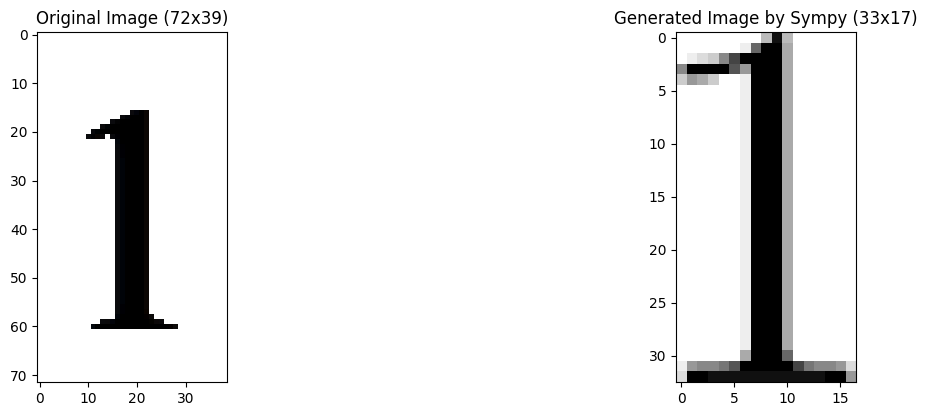

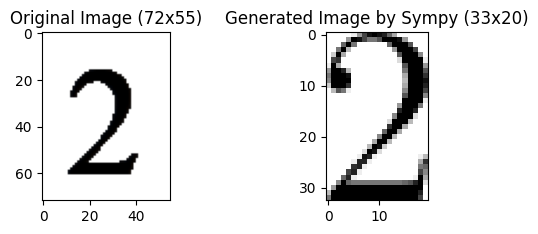

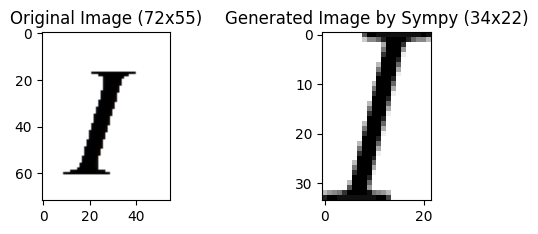

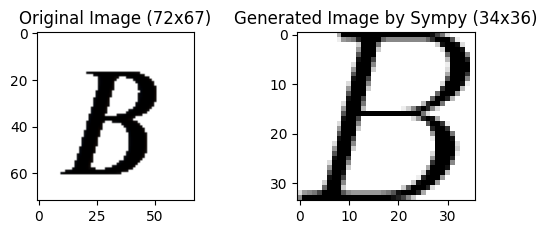

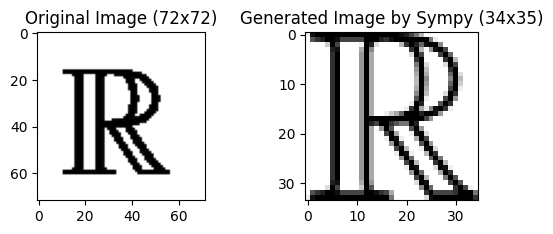

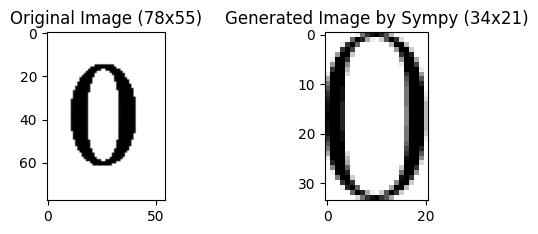

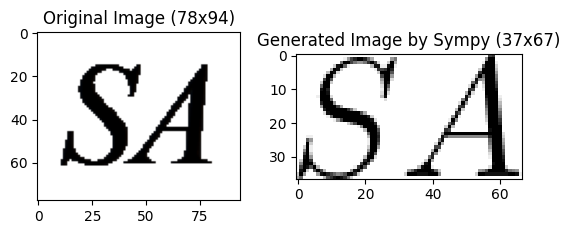

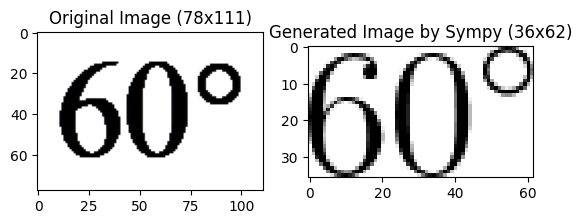

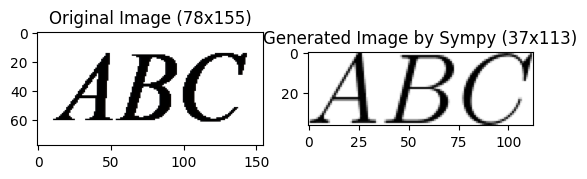

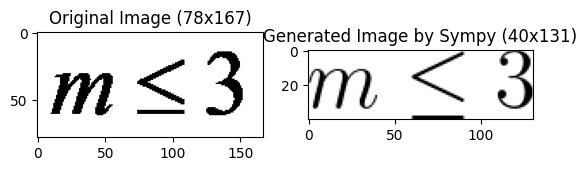

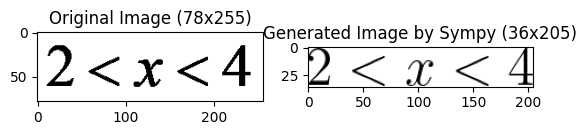

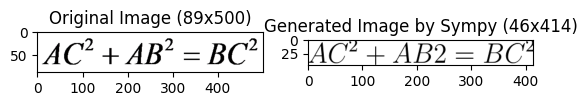

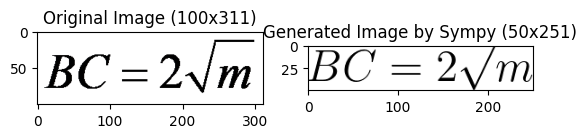

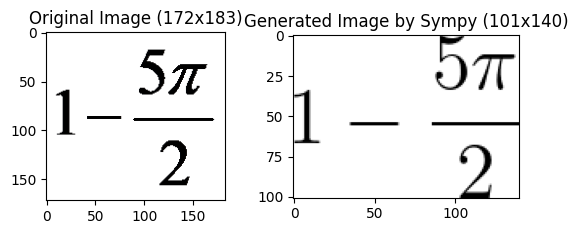

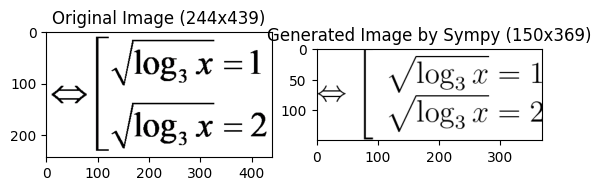

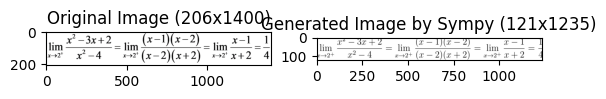

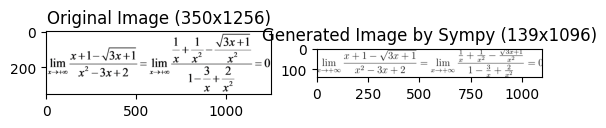

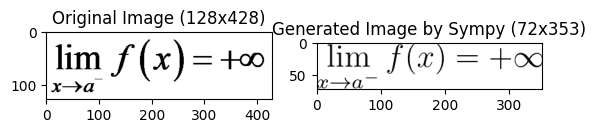

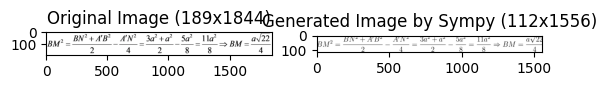

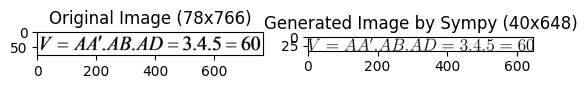

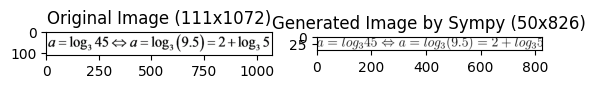

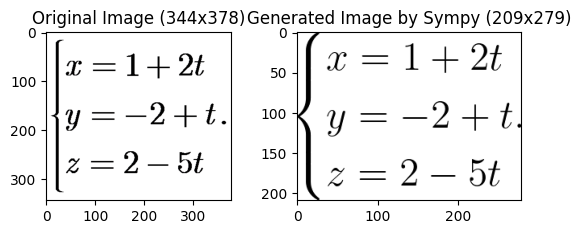

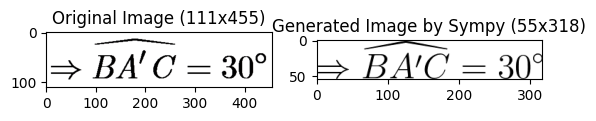

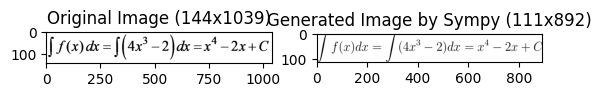

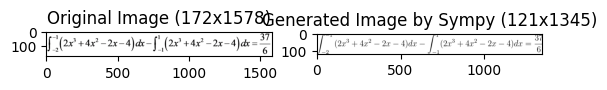

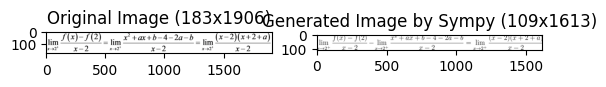

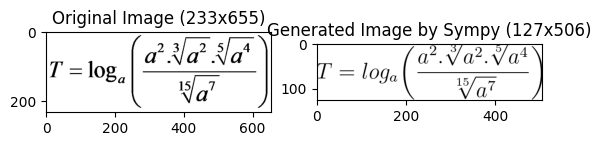

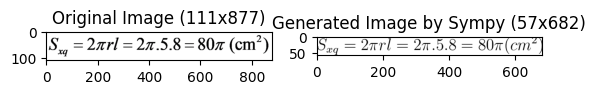

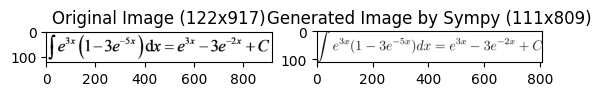

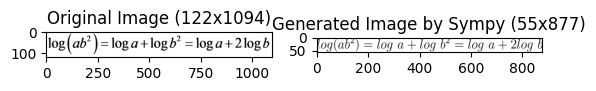

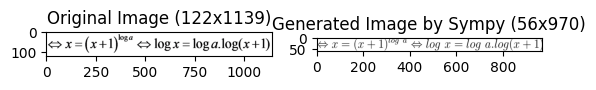

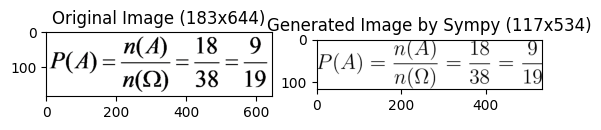

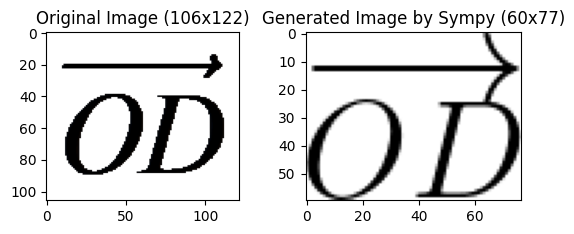

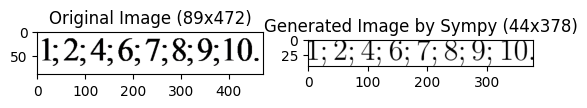

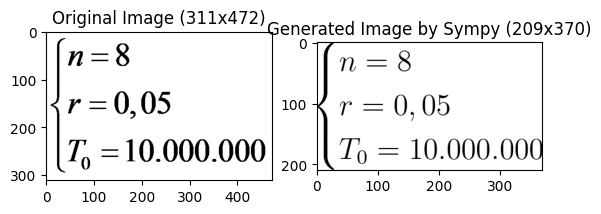

In [71]:
ori_img_path = r"D:\WeAI-Im2Tex_Data\data\DOCX_IMAGES\compare\image_comparision"
simpy_img_path = r"D:\WeAI-Im2Tex_Data\data\DOCX_IMAGES\compare\image_sympy"

#load all images
ori_img = []
simpy_img = []
for idx, file in enumerate(os.listdir(ori_img_path)):
    ori_img.append(cv2.imread(os.path.join(ori_img_path, file)))

for idx, file in enumerate(os.listdir(simpy_img_path)):
    simpy_img.append(cv2.imread(os.path.join(simpy_img_path, file)))


plt.figure(figsize=(15,10))

for idx in range(0, 35):
    plt.subplot(2, 2, 1)
    plt.imshow(ori_img[idx])
    h,w,c = ori_img[idx].shape
    plt.title("Original Image ({}x{})".format(h,w))
    plt.subplot(2, 2, 2)
    plt.imshow(simpy_img[idx])
    h1,w1,c1 = simpy_img[idx].shape
    plt.title("Generated Image by Sympy ({}x{})".format(h1,w1))

    plt.show()    

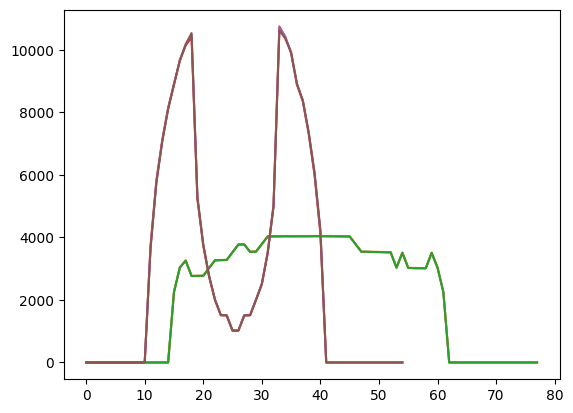

In [119]:
import matplotlib.pyplot as plt
import cv2

img_path = r"D:\WeAI-Im2Tex_Data\data\DOCX_IMAGES\compare\image_comparision\05.png"

img = cv2.imread(img_path)
# plt.imshow(img)
# img.shape #shape is 78x55


img = 255-img

img_row_sum = np.sum(img,axis=1).tolist()
img_col_sum = np.sum(img,axis=0).tolist()

plt.plot(img_row_sum)
plt.plot(img_col_sum)
plt.show()


#crop the white space based on the histogram




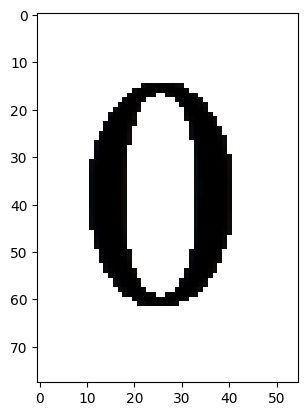

In [121]:
import cv2
import matplotlib.pyplot as plt
import math
img_path = r"D:\WeAI-Im2Tex_Data\data\DOCX_IMAGES\compare\image_comparision\05.png"

image = cv2.imread(img_path)

plt.imshow(image)
plt.show()
x,y,c =image.shape


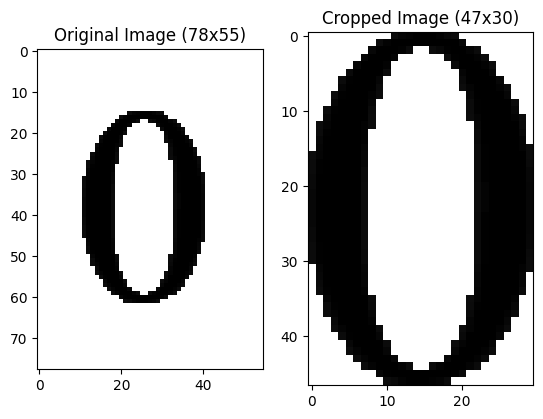

In [8]:
import cv2
import matplotlib.pyplot as plt
import math
img_paths = ###path of images

# def crop_image(img_path):

image = cv2.imread()
x,y,c = image.shape
    
#convert to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


threshold = 30
horizontal = []
vertical = []

for i in range(x):
    for j in range(y):
        if(image[i][j] < threshold):
            horizontal.append(j)
            vertical.append(i)

max_horizontal = max(horizontal)
min_horizontal = min(horizontal)

max_vertical = max(vertical)
min_vertical = min(vertical)
cropped_image = image[min_vertical:max_vertical+1, min_horizontal:max_horizontal+1]

#convert back to RGB
cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_GRAY2RGB)

#writing the cropped image without changing name
cv2.imwrite(img_path, cropped_image)

# # return cropped_image

# plt.subplot(1, 2, 1)
# plt.imshow(image, cmap = 'gray')
# plt.title("Original Image ({}x{})".format(x,y))

# plt.subplot(1, 2, 2)
# a,b,c = cropped_image.shape
# plt.imshow(cropped_image, cmap = 'gray')
# plt.title("Cropped Image ({}x{})".format(a,b))
# plt.show()


In [150]:
path = r"D:\WeAI-Im2Tex_Data\data\DOCX_IMAGES\compare\image_comparision"

sympy_image_path = r"D:\WeAI-Im2Tex_Data\data\DOCX_IMAGES\compare\image_sympy"

cropped_path = r"D:\WeAI-Im2Tex_Data\data\DOCX_IMAGES\compare\cropped"

#read all images in sympy_image_path to get shape
sympy_image = []
for idx, file in enumerate(os.listdir(sympy_image_path)):
    sympy_image.append(cv2.imread(os.path.join(sympy_image_path, file)))


for idx, file in enumerate(os.listdir(path)):
    cropped_image = crop_image(os.path.join(path, file))
    
    #resize image to same size as sympy_image
    cropped_image = cv2.resize(cropped_image, (sympy_image[idx].shape[1], sympy_image[idx].shape[0]))
    
    #save image
    cv2.imwrite(os.path.join(cropped_path, file), cropped_image)
